# Package and Env

## import

In [1]:
# from selenium import webdriver
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import warnings
from matplotlib import font_manager, rc
import platform

## Display Language

In [2]:
if platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname = path).get_name()
    rc('font', family = font_name)
elif platform.system() == 'Darwin':
    rc('font', family = 'AppleGothic')
else:
    print('Check your OS system')

# Crawling

In [3]:
driver = webdriver.Chrome("/Users/Van/202105_lab/driver/chromedriver")
url = "http://www.statiz.co.kr/stat.php?opt=0&sopt=0&re=1&ys=1982&ye=2021&se=0&te=&tm=&ty=0&qu=auto&po=0&as=&ae=&hi=&un=&pl=&da=1&o1=WAR&o2=OutCount&de=1&lr=5&tr=&cv=&ml=1&sn=30&si=&cn="
driver.get(url)
html = driver.page_source
bsObject = BeautifulSoup(html, 'html.parser')
temp = bsObject.find_all("table")[1]

In [5]:
column = ["순","이름","팀","WAR","출장","완투","완봉","선발","승","패","세","홀드","이닝","실점","자책","타자","안타","홈런","볼넷","고4","사구","삼진","보크","폭투","ERA","FIP","WHIP","ERA+","FIP+","WAR"]
df = pd.DataFrame(columns=column)
templen = len(temp.find_all("tr"))
 
for i in range(2, templen):
    tempTr = temp.find_all("tr")[i]
    if(tempTr.find("th") is not None):
        continue
    row = {}
    column_idx = 0
    for j in range(len(column)):
        tempTd = tempTr.find_all("td")[j].text
        if(tempTd == "" and j > 0):
            continue
        row[column[column_idx]] = tempTd
        column_idx += 1
    df = df.append(row,ignore_index=True)


In [6]:
df

,순,이름,팀,WAR,출장,완투,완봉,선발,승,패,...,사구,삼진,보크,폭투,ERA,FIP,WHIP,ERA+,FIP+,WAR
0,1,리그,14,183.56,4937,18,5,1154,569,569,...,616,7657,23,545,5.26,5.27,1.56,98.9,NaN,183.56
1,2,리그,13,180.25,4823,21,6,1152,565,565,...,704,7785,40,530,4.32,4.32,1.44,99.8,NaN,180.25
2,3,리그,00,174.09,3660,47,12,1064,519,519,...,536,6913,39,402,4.61,4.62,1.44,99.9,NaN,174.09
3,4,리그,12,170.62,4336,33,11,1064,517,517,...,498,6672,32,460,3.82,3.82,1.34,100.2,NaN,170.62
4,5,리그,15,170.56,6229,27,12,1440,715,715,...,871,10553,47,763,4.89,4.89,1.49,100.0,NaN,170.56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
358,319,KIA,21,5.39,325,0,0,71,28,43,...,50,481,5,27,5.48,5.19,1.62,84.6,NaN,5.39
359,320,삼미/청보,85,5.24,232,37,3,110,39,70,...,60,393,6,33,4.88,4.35,1.56,74.7,NaN,5.24
360,321,한화,21,5.08,350,1,0,75,27,48,...,42,511,5,34,4.89,5.19,1.56,94.0,NaN,5.08
361,322,롯데,21,4.84,357,1,1,74,31,42,...,47,543,2,50,5.65,4.85,1.59,83.8,NaN,4.84


# Cleansing

In [7]:
df_league = df[df['이름'] == "리그"].reset_index(drop=True)

In [8]:
df_team = df[df['이름'] != "리그"].iloc[:,1:].reset_index(drop=True)
df_team.head()

,이름,팀,WAR,출장,완투,완봉,선발,승,패,세,...,사구,삼진,보크,폭투,ERA,FIP,WHIP,ERA+,FIP+,WAR
0,해태,91,34.99,276,34,10,126,79,42,28,...,53,776,6,21,2.89,3.13,1.11,137.4,NaN,34.99
1,현대,00,33.47,431,5,2,133,91,40,51,...,34,997,4,46,3.64,3.72,1.31,124.2,NaN,33.47
2,SK,09,31.66,556,2,0,133,80,47,33,...,54,1032,3,68,3.67,4.22,1.37,129.1,NaN,31.66
3,해태,95,31.38,316,15,4,126,64,58,40,...,75,872,3,44,3.06,3.27,1.16,123.0,NaN,31.38
4,KIA,09,31.12,480,4,0,133,81,48,38,...,83,893,2,22,3.92,4.13,1.35,120.4,NaN,31.12


In [9]:
# 공백제거
df_team = df_team.apply(lambda x: x.str.strip())

In [10]:
df_team.iloc[:, :10].head(1)

,이름,팀,WAR,출장,완투,완봉,선발,승,패,세
0,해태,91,34.99,276,34,10,126,79,42,28


In [11]:
df_team.iloc[:, 10:20].head(1)

,홀드,이닝,실점,자책,타자,안타,홈런,볼넷,고4,사구
0,0,1130.2,409,363,4546,925,73,324,11,53


In [12]:
df_team.iloc[:, 20:30].head(1)

,삼진,보크,폭투,ERA,FIP,WHIP,ERA+,FIP+,WAR
0,776,6,21,2.89,3.13,1.11,137.4,NaN,34.99


In [13]:
df_stat = df_team.iloc[:,:9]

In [14]:
df_stat["팀"] = df_stat["팀"].astype(int)
df_stat["WAR"] = df_stat["WAR"].astype(float)
df_stat[["출장", "완투", "완봉", "선발", "승", "패"]] = df_stat[["출장", "완투", "완봉", "선발", "승", "패"]].astype(int)

In [15]:
df_stat["tmp"] = np.where(df_stat.팀 < 50, 2000, 1900)
df_stat["팀"] = df_stat["tmp"]+df_stat["팀"]
df_stat = df_stat.iloc[:,:-1]

In [17]:
df_stat

,이름,팀,WAR,출장,완투,완봉,선발,승,패
0,해태,1991,34.99,276,34,10,126,79,42
1,현대,2000,33.47,431,5,2,133,91,40
2,SK,2009,31.66,556,2,0,133,80,47
3,해태,1995,31.38,316,15,4,126,64,58
4,KIA,2009,31.12,480,4,0,133,81,48
...,...,...,...,...,...,...,...,...,...
318,KIA,2021,5.39,325,0,0,71,28,43
319,삼미/청보,1985,5.24,232,37,3,110,39,70
320,한화,2021,5.08,350,1,0,75,27,48
321,롯데,2021,4.84,357,1,1,74,31,42


In [16]:
df_stat[df_stat.이름 == "해태"].sort_values(by="팀")

,이름,팀,WAR,출장,완투,완봉,선발,승,패
286,해태,1982,11.88,154,24,2,80,38,42
213,해태,1983,16.63,212,27,10,100,55,44
216,해태,1984,16.52,224,27,6,100,43,54
232,해태,1985,15.76,281,11,2,110,57,52
48,해태,1986,24.65,257,28,11,108,67,37
99,해태,1987,21.88,241,26,8,108,55,48
15,해태,1988,27.99,228,26,7,108,68,38
19,해태,1989,26.85,237,30,12,120,65,51
23,해태,1990,26.29,269,34,14,120,68,49
0,해태,1991,34.99,276,34,10,126,79,42


# Visualization

## In jupyter

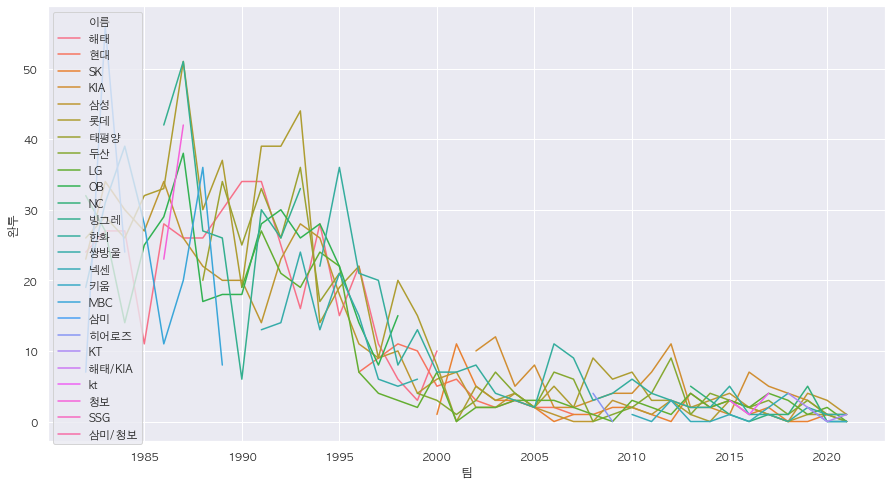

In [22]:
sns.set(font="AppleGothic", 
        rc={"axes.unicode_minus":False, 'figure.figsize':(15,8)},
        style='darkgrid')
a = sns.lineplot(x="팀", y="완투", hue="이름", data=df_stat)

## In Web

In [18]:
df_stat_cg = df_stat.groupby(["이름", "팀"])["완투"].sum().to_frame().unstack("이름").fillna(0)

In [60]:
df_stat_array = df_stat[df_stat["이름"]=="해태"][["팀", "완투"]].to_numpy().tolist()
df_stat_array.sort()

In [61]:
df_stat_array

[[1982, 24],
 [1983, 27],
 [1984, 27],
 [1985, 11],
 [1986, 28],
 [1987, 26],
 [1988, 26],
 [1989, 30],
 [1990, 34],
 [1991, 34],
 [1992, 25],
 [1993, 16],
 [1994, 28],
 [1995, 15],
 [1996, 22],
 [1997, 11],
 [1998, 6],
 [1999, 3],
 [2000, 10]]

# Next...

1. input값을 받아서 select한 정보만 출력
2. pandas의 dataframe　형식을 js에서 표시
3. google char가 아닌 python lib로 출력